<a href="https://colab.research.google.com/github/bysischpok/Lab1/blob/main/%D0%9B%D0%B0%D0%B12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB
   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  

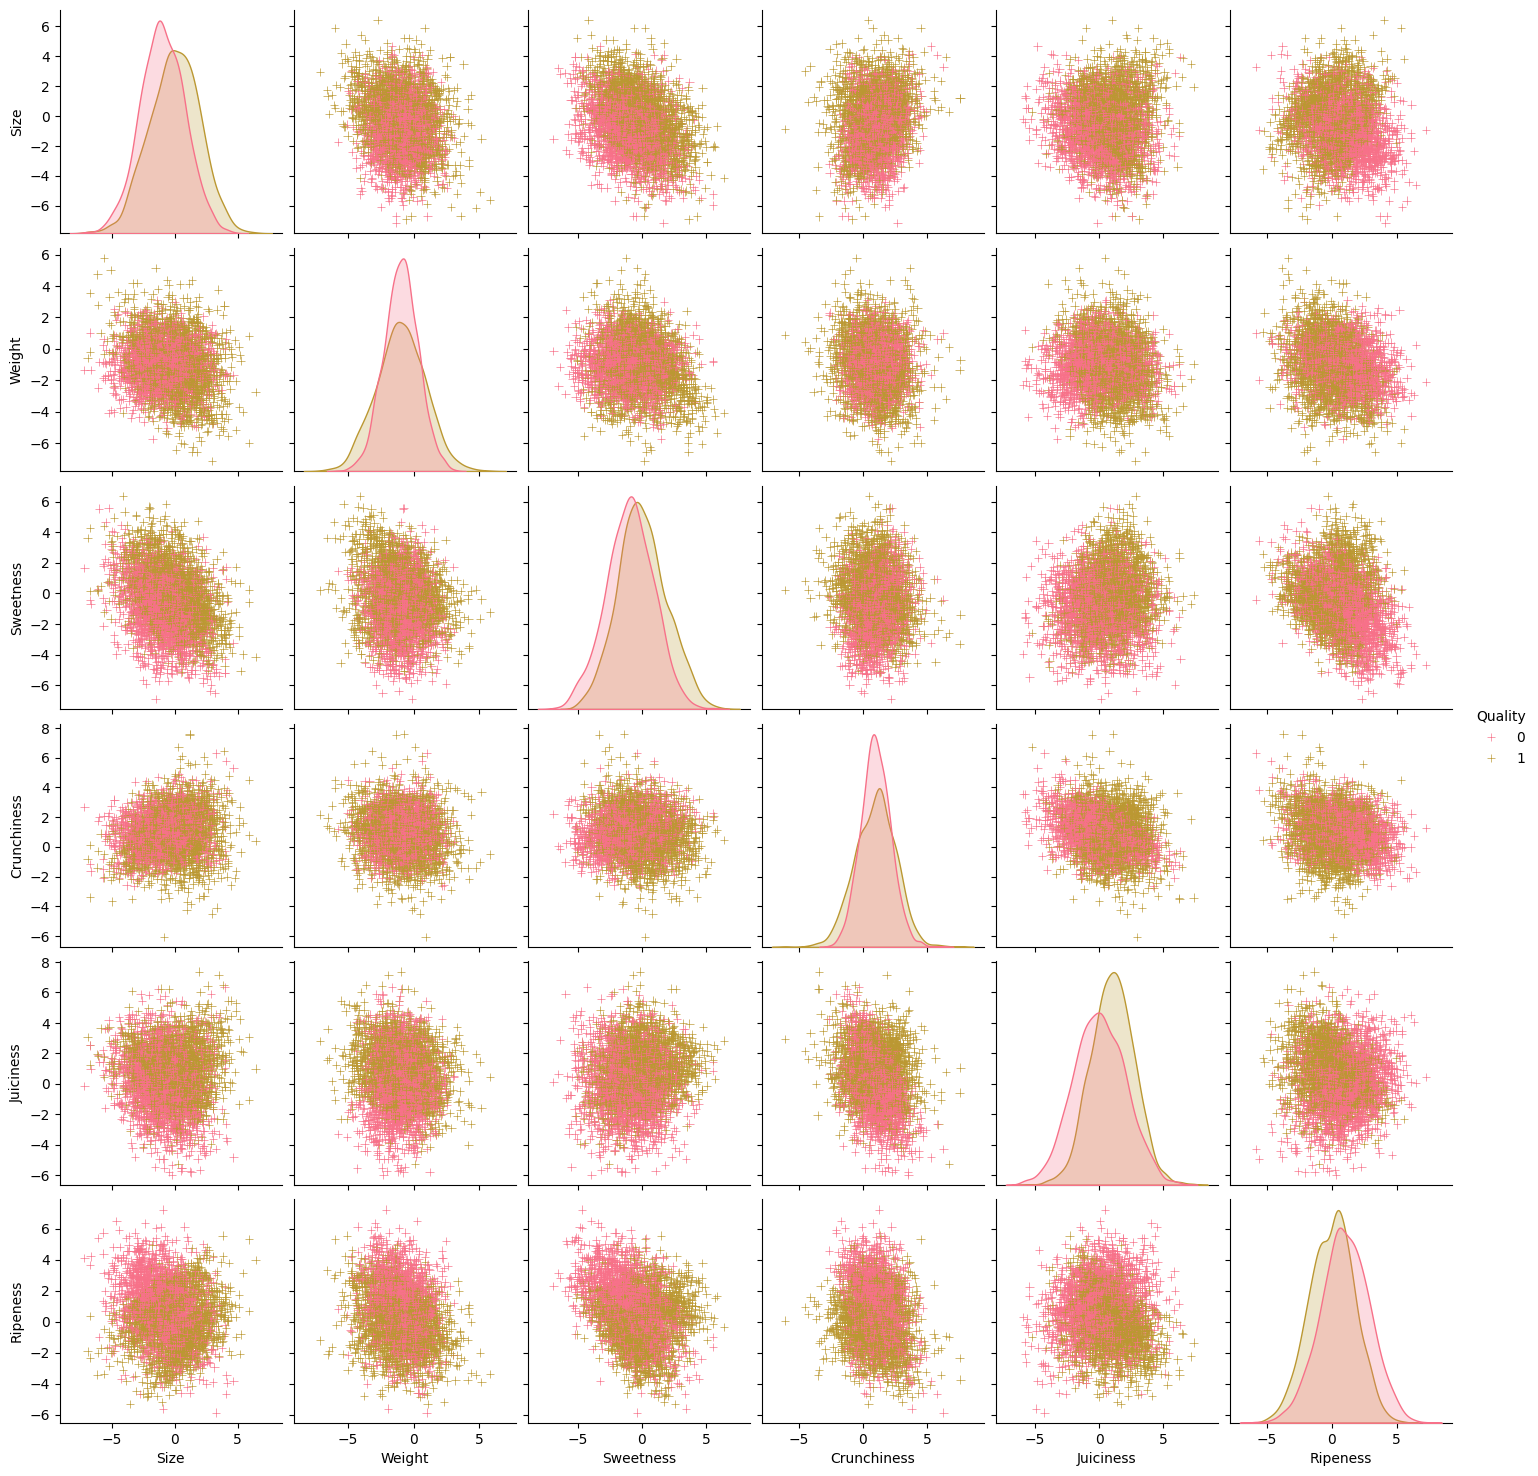

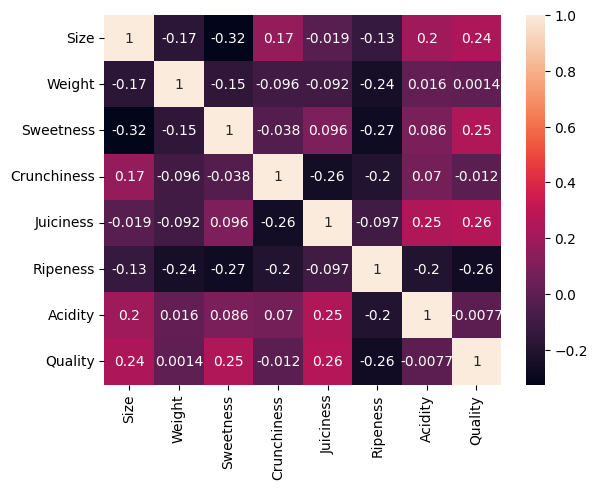

LR: 0.745312 (0.015452)
LDA: 0.743437 (0.017922)
KNN: 0.895000 (0.013919)
CART: 0.795312 (0.029655)
NB: 0.751562 (0.031784)
SVC: 0.911250 (0.013564)
Наилучшие показатели у метода опорных векторов(SVC)
Точность: 0.902


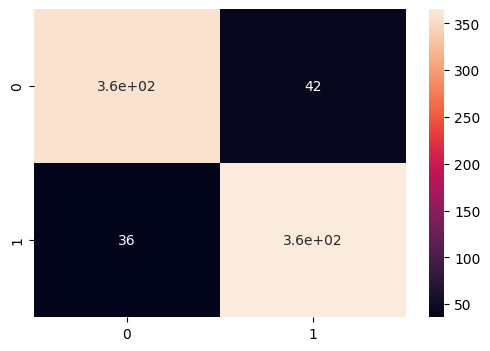

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#Загружаем датасет и показываем всю информацию
data = pd.read_csv('apple_quality.csv')
data.info()
print(data.head())
data['Quality'].value_counts()
#Удаляем пустые строки, заменяем категориальные значения в столбце Quality
data = data.dropna()
data = data.drop(['A_id'], axis=1)
replace_dict = {'good': 1, 'bad': 0}
data['Quality'] = data['Quality'].map(replace_dict)
#Визуализируем данные
sns.pairplot(data, hue='Quality', markers='+')
plt.show()
sns.heatmap(data.corr(), annot=True)
plt.show()
#Делим набор данных на train и test
X = data.drop(['Quality'], axis=1)
y = data['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15, stratify=y)
stats.ttest_ind (a=y_train, b=y_test)
#Выбираем наилучшую модель
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
print("Наилучшие показатели у метода опорных векторов(SVC)")
#Обучаем модель SVC и проверяем её точность
svc_model = SVC()
svc_model.fit(X_train,y_train)
model_pred = svc_model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, model_pred)
print(f"Точность: {accuracy:.3f}")
#Матрица путаницы
#Это оказалось наиболее удобным способом визуализации для моего результата
model_matrix = confusion_matrix(y_test, model_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(model_matrix, annot=True)
plt.show()